### Deep Neural Networks

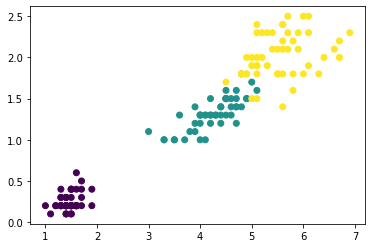

In [1]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt 

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = iris.target

plt.scatter(X[:,0],X[:,1],c=y)

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Let's build our first neural network. You will have to choose a Tensorflow kernel on OOD.

We will use Keras implemented onto Tensorflow.

Keras: https://keras.io/

Tensorflow: https://www.tensorflow.org/

In [3]:
import tensorflow.keras as keras

# Initialize a model.
model = keras.models.Sequential()

# Add the input layer and specifying its shape.
model.add(keras.layers.Input(shape=X_train.shape[1]))

# Add the first hidden layer with 10 neurons and the ReLU activation function.
model.add(keras.layers.Dense(1000, activation='relu'))

# Add the second hidden layer with 10 neurons and the ReLU activation function.
model.add(keras.layers.Dense(1000, activation='relu'))

# Add the output layer
model.add(keras.layers.Dense(np.unique(y).shape[0], activation='softmax'))

2021-11-18 09:20:52.347025: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/slurm/lib64:/opt/slurm/lib64::
2021-11-18 09:20:52.347072: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-18 09:20:52.347103: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c0704a-s2.ufhpc): /proc/driver/nvidia/version does not exist
2021-11-18 09:20:52.347403: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### We can use the following syntax instead.

In [4]:
model = keras.models.Sequential()

# This line combines the input layer and the first hidden layer.
model.add(keras.layers.Dense(1000, input_dim=X_train.shape[1], activation='relu'))
model.add(keras.layers.Dense(1000, activation='relu'))
model.add(keras.layers.Dense(np.unique(y).shape[0], activation='softmax'))

### We can also use the following syntax.

In [5]:
model = keras.models.Sequential([
    keras.layers.Input(shape=X_train.shape[1]),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(1000, activation='relu',),
    keras.layers.Dense(np.unique(y).shape[0], activation='softmax')
])

### Let's check the "architecture" of our neural network. Note that the input layer does not show up here.

In [6]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1000)              3000      
_________________________________________________________________
dense_7 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 3003      
Total params: 1,007,003
Trainable params: 1,007,003
Non-trainable params: 0
_________________________________________________________________


### We can also have a look at the weights.

In [7]:
model.weights

[<tf.Variable 'dense_6/kernel:0' shape=(2, 1000) dtype=float32, numpy=
 array([[ 0.0061527 ,  0.06774743, -0.07542983, ..., -0.01343764,
         -0.00240877,  0.03150436],
        [-0.03755854,  0.0462527 , -0.01792387, ..., -0.058469  ,
         -0.03261517, -0.01701734]], dtype=float32)>,
 <tf.Variable 'dense_6/bias:0' shape=(1000,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 

### Now, we need to "compile" the model before we fit to the data.

Some useful links

Loss functions: https://keras.io/api/losses/ 

Optimizers: https://keras.io/api/optimizers/ 

Metrics: https://keras.io/api/metrics/

In [8]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

### We are ready to train our first neural network. Let's start training!

In [9]:
# history will record the loss, accuracy, etc. 
# validation_split will split the training dataset into training + validation datasets. 
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

2021-11-18 09:20:53.383431: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
3/3 [==============================] - 0s 71ms/step - loss: 1.0665 - accuracy: 0.3854 - val_loss: 0.9553 - val_accuracy: 0.2917
Epoch 2/100
3/3 [==============================] - 0s 17ms/step - loss: 0.9937 - accuracy: 0.4062 - val_loss: 0.9833 - val_accuracy: 0.2917
Epoch 3/100
3/3 [==============================] - 0s 17ms/step - loss: 0.9428 - accuracy: 0.3958 - val_loss: 0.9921 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 16ms/step - loss: 0.8723 - accuracy: 0.6771 - val_loss: 0.8544 - val_accuracy: 0.5417
Epoch 5/100
3/3 [==============================] - 0s 15ms/step - loss: 0.8374 - accuracy: 0.6354 - val_loss: 0.8282 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 18ms/step - loss: 0.7772 - accuracy: 0.6250 - val_loss: 0.7460 - val_accuracy: 0.6250
Epoch 7/100
3/3 [==============================] - 0s 16ms/step - loss: 0.7246 - accuracy: 0.7292 - val_loss: 0.7049 - val_accuracy: 0.7083
Epoch 8/100
3/3 [===

### Let's evlauate the model using the test dataset.

In [10]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.22555918991565704
Test accuracy: 0.8333333134651184


### Let's check how loss and validation loss evolved over epoch.

Text(0, 0.5, 'loss, validation loss')

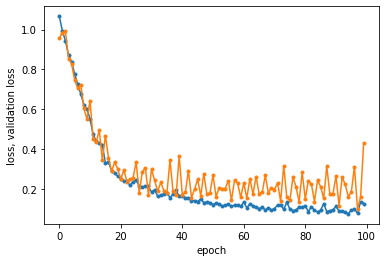

In [11]:
plt.plot(history.epoch, history.history['loss'],'.-')
plt.plot(history.epoch, history.history['val_loss'],'.-')
plt.xlabel('epoch')
plt.ylabel('loss, validation loss')

### Let's check how accuracy and validation accuracy evolved over epoch.

Text(0, 0.5, 'accuracy, validation accuracy')

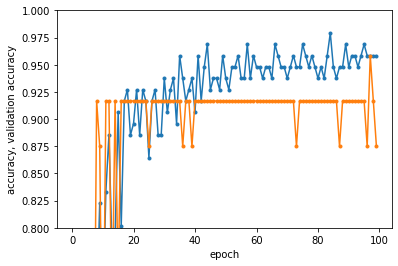

In [12]:
plt.plot(history.epoch, history.history['accuracy'],'.-')
plt.plot(history.epoch, history.history['val_accuracy'],'.-')
plt.ylim(0.8,1)
plt.xlabel('epoch')
plt.ylabel('accuracy, validation accuracy')

### Let's check out weights and biases.

In [13]:
model.layers

In [14]:
hidden1 = model.layers[0]

In [15]:
hidden1.name

'dense_6'

### Let's put weights and biases of the first hidden layer in w1 and b1.

In [16]:
w1, b1 = hidden1.get_weights()

In [17]:
w1

array([[ 0.00917503,  0.07404859, -0.07542983, ..., -0.01343764,
        -0.00240877,  0.02922284],
       [-0.04438104,  0.0535323 , -0.01792387, ..., -0.058469  ,
        -0.03261517, -0.03068417]], dtype=float32)

In [18]:
w1.shape

(2, 1000)

In [19]:
b1

array([ 0.0920516 , -0.05226126,  0.        , -0.00572249,  0.        ,
        0.        ,  0.        , -0.07633278, -0.07280762,  0.06334601,
        0.0624938 ,  0.        , -0.08431925, -0.03972238,  0.        ,
        0.        , -0.06975117, -0.07232545, -0.0771235 ,  0.        ,
        0.08481432, -0.0676049 , -0.07299846,  0.        ,  0.        ,
       -0.06323407,  0.07010484, -0.04337957,  0.        ,  0.        ,
        0.        ,  0.        , -0.05135972,  0.        ,  0.        ,
       -0.05337542,  0.07396548,  0.        ,  0.        , -0.06793845,
        0.        , -0.05048333, -0.04219189,  0.03998753, -0.06394845,
        0.08266529, -0.07238549,  0.        ,  0.        ,  0.02699939,
       -0.08357377,  0.05497975, -0.04206736, -0.05807341,  0.        ,
       -0.06371813,  0.        ,  0.02431559,  0.08807977,  0.07859845,
       -0.07073694,  0.        ,  0.05743493, -0.0687333 ,  0.09058336,
        0.06388481,  0.        ,  0.08913297,  0.        , -0.06

In [20]:
b1.shape

(1000,)

### We can save the model and then load it as needed.

In [21]:
model.save("iris_model_final.h5")

In [22]:
model_new = keras.models.load_model("iris_model_final.h5")

In [23]:
model_new.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1000)              3000      
_________________________________________________________________
dense_7 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 3003      
Total params: 1,007,003
Trainable params: 1,007,003
Non-trainable params: 0
_________________________________________________________________


### Let's try a larger dataset = the MNIST dataset.

In [24]:
import tensorflow.keras as keras

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

### Scale the images to 0 - 1.

In [25]:
X_train = X_train / 255.
X_test = X_test / 255.

### For now, let's use 10% of the data.

In [26]:
X_train = X_train[::10]
X_test = X_test[::10]

y_train = y_train[::10]
y_test = y_test[::10]

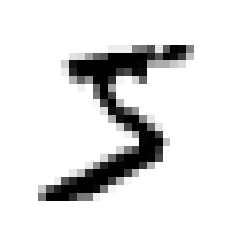

In [27]:
import matplotlib.pyplot as plt 

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

### TODO: Let's build a NN.

In [28]:
model = keras.models.Sequential()

# We need to flatten the 2d input arrays to 1d arrays.
model.add(keras.layers.Flatten(input_shape=[28, 28]))

# Add a hidden layer having 1000 neurons and ReLU.
model.add(keras.layers.Dense(1000, activation="relu"))

# Add another hidden layer having 1000 neurons and ReLU.
model.add(keras.layers.Dense(1000, activation="relu"))

# Add an output layer having "softmax" activation function. How many neurons do you need for this layer?
model.add(keras.layers.Dense(10, activation="softmax"))

### TODO: Print out the model summary and make sure things are correctly set up.

In [29]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_10 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_11 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________


### Compile the model. Let's first try Stochastic Gradient Descent with learning rate of 1.0e-3.

In [30]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

### TODO: Train the model using 100 epochs and 20 % of the data in the validation dataset.

In [31]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
150/150 [==============================] - 2s 10ms/step - loss: 2.2429 - accuracy: 0.2281 - val_loss: 2.1895 - val_accuracy: 0.3708
Epoch 2/100
150/150 [==============================] - 1s 9ms/step - loss: 2.1093 - accuracy: 0.4967 - val_loss: 2.0705 - val_accuracy: 0.5317
Epoch 3/100
150/150 [==============================] - 1s 9ms/step - loss: 1.9889 - accuracy: 0.6029 - val_loss: 1.9574 - val_accuracy: 0.6000
Epoch 4/100
150/150 [==============================] - 1s 9ms/step - loss: 1.8729 - accuracy: 0.6538 - val_loss: 1.8453 - val_accuracy: 0.6450
Epoch 5/100
150/150 [==============================] - 1s 9ms/step - loss: 1.7584 - accuracy: 0.7002 - val_loss: 1.7349 - val_accuracy: 0.6892
Epoch 6/100
150/150 [==============================] - 1s 10ms/step - loss: 1.6460 - accuracy: 0.7254 - val_loss: 1.6260 - val_accuracy: 0.7100
Epoch 7/100
150/150 [==============================] - 1s 9ms/step - loss: 1.5369 - accuracy: 0.7469 - val_loss: 1.5215 - val_accuracy: 0.73

### Note that in each epoch, there are 150 steps (= mini batches)

In [32]:
X_train.shape

(6000, 28, 28)

In [33]:
X_train.shape[0]*0.8/32

150.0

### TODO: Evaluate the model using the test dataset.

In [34]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.3863213360309601
Test accuracy: 0.8859999775886536


### Let's check some of the results.

array([[0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.994, 0.   ,
        0.004]], dtype=float32)

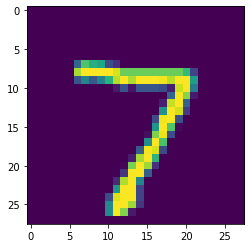

In [35]:
n = 0

# Display the image.
plt.imshow(X_test[n])

# Model prediction: probability for each class.
y_prob = model.predict(np.expand_dims(X_test[n], axis=0))
y_prob.round(3)

### The evaluation score is 88.8%, which is okay but not very impressive. Why? Can we improve the performance?

### Let's check how loss and accuracy have evolved over the training.

Text(0, 0.5, 'loss, validation loss')

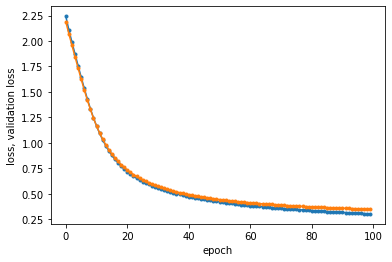

In [36]:
plt.plot(history.epoch, history.history['loss'],'.-')
plt.plot(history.epoch, history.history['val_loss'],'.-')
plt.xlabel('epoch')
plt.ylabel('loss, validation loss')

Text(0, 0.5, 'accuracy, validation accuracy')

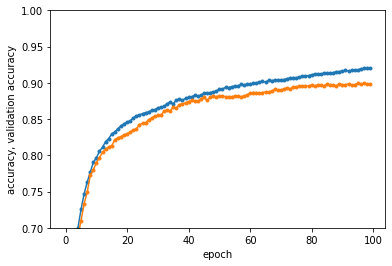

In [37]:
plt.plot(history.epoch, history.history['accuracy'],'.-')
plt.plot(history.epoch, history.history['val_accuracy'],'.-')
plt.ylim(0.7,1)
plt.xlabel('epoch')
plt.ylabel('accuracy, validation accuracy')

### It seems like the model is still underfitting. We can increase the number of epochs, but we can try to use the "adam" optimizer which will monitor and adjust the learning rate as the training proceeds.

In [38]:
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [39]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_13 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_14 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________


In [40]:
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              metrics=["accuracy"])

In [41]:
history2 = model2.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
150/150 [==============================] - 2s 11ms/step - loss: 0.5112 - accuracy: 0.8415 - val_loss: 0.3137 - val_accuracy: 0.9042
Epoch 2/100
150/150 [==============================] - 2s 10ms/step - loss: 0.1772 - accuracy: 0.9446 - val_loss: 0.2580 - val_accuracy: 0.9175
Epoch 3/100
150/150 [==============================] - 2s 11ms/step - loss: 0.1049 - accuracy: 0.9667 - val_loss: 0.2508 - val_accuracy: 0.9217
Epoch 4/100
150/150 [==============================] - 2s 11ms/step - loss: 0.0825 - accuracy: 0.9754 - val_loss: 0.2646 - val_accuracy: 0.9342
Epoch 5/100
150/150 [==============================] - 2s 12ms/step - loss: 0.0477 - accuracy: 0.9837 - val_loss: 0.2842 - val_accuracy: 0.9217
Epoch 6/100
150/150 [==============================] - 2s 11ms/step - loss: 0.0360 - accuracy: 0.9887 - val_loss: 0.3453 - val_accuracy: 0.9183
Epoch 7/100
150/150 [==============================] - 2s 11ms/step - loss: 0.0418 - accuracy: 0.9837 - val_loss: 0.2528 - val_accuracy:

In [50]:
loss, accuracy = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.36899930238723755
Test accuracy: 0.8902000188827515


### Let's check how loss and accuracy have evolved over the training.

Text(0, 0.5, 'loss, validation loss')

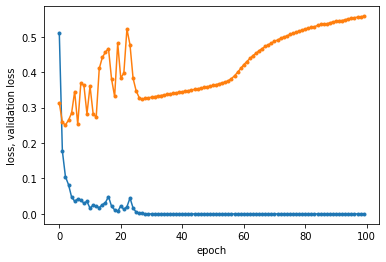

In [42]:
plt.plot(history2.epoch, history2.history['loss'],'.-')
plt.plot(history2.epoch, history2.history['val_loss'],'.-')
plt.xlabel('epoch')
plt.ylabel('loss, validation loss')

Text(0, 0.5, 'accuracy, validation accuracy')

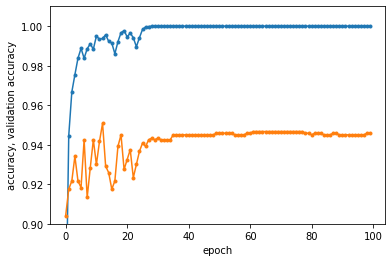

In [43]:
plt.plot(history2.epoch, history2.history['accuracy'],'.-')
plt.plot(history2.epoch, history2.history['val_accuracy'],'.-')
plt.ylim(0.9,1.01)
plt.xlabel('epoch')
plt.ylabel('accuracy, validation accuracy')

### Adam optimizer turned out to be extremely efficient! That's good but in this case do we have to train the model for the entire 100 epochs?

### Early stopping

In [44]:
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [45]:
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              metrics=["accuracy"])

In [46]:
# The default monitor is "val_loss"
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)

history2 = model2.fit(X_train, y_train, epochs=100,
                    validation_split=0.2,
                    callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/100
150/150 [==============================] - 2s 12ms/step - loss: 0.5239 - accuracy: 0.8342 - val_loss: 0.2839 - val_accuracy: 0.9075
Epoch 2/100
150/150 [==============================] - 2s 11ms/step - loss: 0.1780 - accuracy: 0.9440 - val_loss: 0.2841 - val_accuracy: 0.9125
Epoch 3/100
150/150 [==============================] - 2s 11ms/step - loss: 0.0884 - accuracy: 0.9725 - val_loss: 0.2605 - val_accuracy: 0.9258
Epoch 4/100
150/150 [==============================] - 2s 11ms/step - loss: 0.0651 - accuracy: 0.9783 - val_loss: 0.2672 - val_accuracy: 0.9333
Epoch 5/100
150/150 [==============================] - 2s 11ms/step - loss: 0.0561 - accuracy: 0.9829 - val_loss: 0.2825 - val_accuracy: 0.9342
Epoch 6/100
150/150 [==============================] - 2s 11ms/step - loss: 0.0347 - accuracy: 0.9887 - val_loss: 0.2614 - val_accuracy: 0.9358
Epoch 7/100
150/150 [==============================] - 2s 11ms/step - loss: 0.0310 - accuracy: 0.9892 - val_loss: 0.3240 - val_accuracy:

In [51]:
loss, accuracy = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.36899930238723755
Test accuracy: 0.8902000188827515


Text(0, 0.5, 'loss, validation loss')

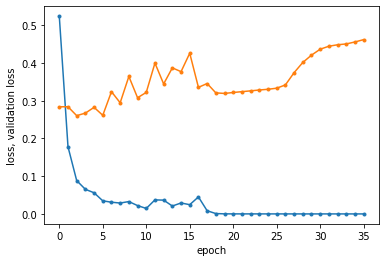

In [47]:
plt.plot(history2.epoch, history2.history['loss'],'.-')
plt.plot(history2.epoch, history2.history['val_loss'],'.-')
plt.xlabel('epoch')
plt.ylabel('loss, validation loss')

### TODO: With the "adam" optimizer and early stopping, we can train the model pretty efficiently. Now, let's use the entire MNIST dataset (instead of just 10 %) and see what accuracy we get.

In [2]:
import tensorflow.keras as keras

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train = X_train / 255.
X_test = X_test / 255.

In [3]:
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

2021-11-18 10:30:45.106280: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              metrics=["accuracy"])

In [54]:
# The default monitor is "val_loss"
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)

history2 = model2.fit(X_train, y_train, epochs=100,
                    validation_split=0.2,
                    callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/100
1500/1500 [==============================] - 17s 11ms/step - loss: 0.1946 - accuracy: 0.9398 - val_loss: 0.1249 - val_accuracy: 0.9626
Epoch 2/100
1500/1500 [==============================] - 16s 10ms/step - loss: 0.0858 - accuracy: 0.9742 - val_loss: 0.0990 - val_accuracy: 0.9717
Epoch 3/100
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0600 - accuracy: 0.9808 - val_loss: 0.1115 - val_accuracy: 0.9712
Epoch 4/100
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0477 - accuracy: 0.9852 - val_loss: 0.1012 - val_accuracy: 0.9739
Epoch 5/100
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0387 - accuracy: 0.9876 - val_loss: 0.0995 - val_accuracy: 0.9759
Epoch 6/100
1500/1500 [==============================] - 16s 10ms/step - loss: 0.0322 - accuracy: 0.9897 - val_loss: 0.1033 - val_accuracy: 0.9764
Epoch 7/100
1500/1500 [==============================] - 16s 10ms/step - loss: 0.0285 - accuracy: 0.9912 - val_loss: 0

In [55]:
loss, accuracy = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.19073520600795746
Test accuracy: 0.9810000061988831


### Q: What accuracy did you obtain? Are you satisfied?

### We can also take advantage of HiPerGator's A100 GPUs! You need to ask for a GPU when you open a session.

In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


2021-11-18 10:22:44.754732: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/slurm/lib64:/opt/slurm/lib64::
2021-11-18 10:22:44.754777: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-18 10:22:44.754803: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c0704a-s3.ufhpc): /proc/driver/nvidia/version does not exist


### TODO: Repeat the above training using the full MNIST dataset and see how long (or short) it takes.

### For fun, let's have a look at what some of the most widely-used neural networks look like. Here, we will check out the 101-layer residual network implemented into Keras.

In [189]:
model = keras.applications.ResNet101V2(
    include_top=True, weights='imagenet', input_tensor=None,
    input_shape=None, pooling=None, classes=1000
)


179527680/179518384 [==============================] - 2s 0us/step


In [190]:
model.summary()

Model: "resnet101v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_18 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_18[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
________________________________________________________________________________________